<a href="https://colab.research.google.com/github/Soyeon250/DataAnalysis/blob/main/3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

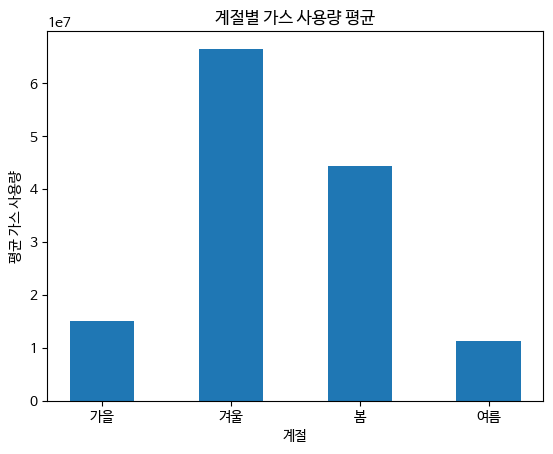

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1, 12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

result_data = []

api_key = "5a4e4156566c737935305568525850"

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if 'energyUseDataSummaryInfo' in data:
            if 'row' in data['energyUseDataSummaryInfo']:
              rows = data['energyUseDataSummaryInfo']['row']

            for item in rows:
              if item.get('MM_TYPE') == '개인':

                  energy_data = {
                      'YEAR': item.get('YEAR'),
                      'MON': item.get('MON'),
                      '전기': item.get('EUS'),
                      '가스': item.get('GUS'),
                      '수도': item.get('WUS'),
                      '지역난방': item.get('HUS')
                  }
                  result_data.append(energy_data)

df = pd.DataFrame(result_data)

## 연도(year) 컬럼 생성
df['연도'] = df['YEAR']

## 계절(season) 컬럼 생성
def get_season(month):
    if 3 <= month <= 5: return '봄'
    elif 6 <= month <= 8: return '여름'
    elif 9 <= month <= 11: return '가을'
    else: return '겨울'
df['계절'] = df['MON'].astype(int).apply(get_season)

## 에너지 컬럼들을 숫자로 변환
energy_cols = ['전기', '가스', '수도', '지역난방']
df[energy_cols] = df[energy_cols].apply(pd.to_numeric)

## 계절별 가스 사용량 평균 계산
seasonal_gas_avg = df.groupby('계절')['가스'].mean()

## 막대 그래프 생성
plt.bar(seasonal_gas_avg.index, seasonal_gas_avg.values, width=0.5)

## 그래프 제목 및 축 이름 설정
plt.title('계절별 가스 사용량 평균')
plt.xlabel('계절')
plt.ylabel('평균 가스 사용량')

## 그래프 출력
plt.show()